<a href="https://colab.research.google.com/github/srj3777/AI-Model/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [4]:
sales_df=pd.read_excel("/content/drive/MyDrive/LAB/Sales.xlsx")
sales_df

,Months,Sales
0,Januaray,20000
1,February,12000
2,March,18000
3,April,16000
4,May,22000
5,June,20000
6,July,24000
7,August,23000
8,September,25000


In [47]:
month_to_num = {
    'Januaray': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}



# Strip whitespace from the 'Months' column values before mapping
sales_df['Months'] = sales_df['Months'].str.strip()

sales_df['Month_Num'] = sales_df['Months'].map(month_to_num)

# Convert the numeric month column to a NumPy array
months_np_array = np.array(sales_df['Month_Num'])

print("\nNumPy array of months")
print(months_np_array)


NumPy array of months
[1 2 3 4 5 6 7 8 9]


In [16]:
sales_np_array = np.array(sales_df['Sales'])

print("\nNumPy array of sales")
print(sales_np_array)


NumPy array of sales
[20000 12000 18000 16000 22000 20000 24000 23000 25000]


In [17]:
# Calculate the means of X and Y
mean_months_x = np.mean(months_np_array)
mean_sales_y = np.mean(sales_np_array)

print(f"Mean of x (\u00afx): {mean_months_x}")
print(f"Mean of y (\u00afy): {mean_sales_y}\n")

Mean of x (¯x): 5.0
Mean of y (¯y): 20000.0



In [20]:
# Calculate the numerator and denominator for the slope formula
numerator = np.sum((months_np_array - mean_months_x) * (sales_np_array - mean_sales_y))
denominator = np.sum((months_np_array - mean_months_x)**2)

# Calculate the slope (m)
m = numerator / denominator

# Calculate the intercept (b)

b = mean_sales_y - m * mean_months_x


print(f"Calculated Slope (m): {m:.2f}")
print(f"Calculated Intercept (b): {b:.2f}")

# Now, let's make predictions using our calculated line
y_pred_math = b + m * months_np_array
print(f"\nPredicted y values (Mathematical Approach): {y_pred_math}")

Calculated Slope (m): 1150.00
Calculated Intercept (b): 14250.00

Predicted y values (Mathematical Approach): [15400. 16550. 17700. 18850. 20000. 21150. 22300. 23450. 24600.]


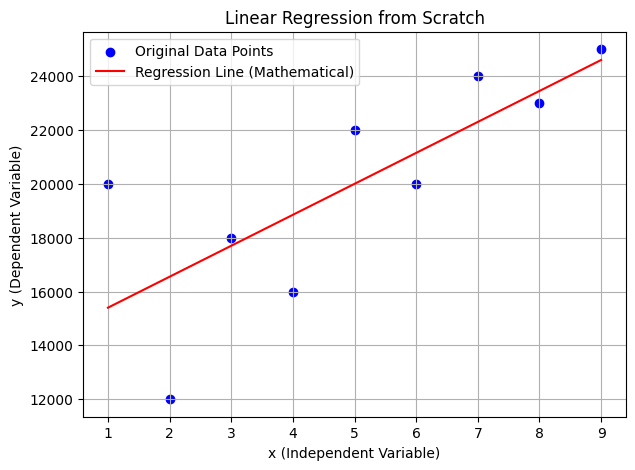

In [22]:
# Plot the original data points and the regression line
plt.figure(figsize=(7, 5))
plt.scatter(months_np_array, sales_np_array, color='blue', label='Original Data Points') # Corrected x and y for scatter plot
plt.plot(months_np_array, y_pred_math, color='red', label='Regression Line (Mathematical)') # Corrected x for plot
plt.title('Linear Regression from Scratch')
plt.xlabel('x (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.grid(True)
plt.legend()
plt.show()

In [28]:
#Predicting Sales for  October,November and December
new_months_df = pd.DataFrame({'Months': ['October', 'November', 'December']})

new_months_df['Month_Num'] = new_months_df['Months'].map(month_to_num)

display(new_months_df)

,Months,Month_Num
0,October,10
1,November,11
2,December,12


In [38]:
#Predict Sales for New Months
new_months_df['Predicted_Sales'] = b + m * new_months_df['Month_Num']

display(new_months_df)

,Months,Month_Num,Predicted_Sales
0,October,10,25750.0
1,November,11,26900.0
2,December,12,28050.0


In [42]:

new_months_df_for_concat = new_months_df[['Months', 'Month_Num']].copy()
new_months_df_for_concat['Sales'] = new_months_df['Predicted_Sales']

combined_sales_df = pd.concat([sales_df, new_months_df_for_concat], ignore_index=True)



display(combined_sales_df)

,Months,Sales,Month_Num
0,Januaray,20000.0,1
1,February,12000.0,2
2,March,18000.0,3
3,April,16000.0,4
4,May,22000.0,5
5,June,20000.0,6
6,July,24000.0,7
7,August,23000.0,8
8,September,25000.0,9
9,October,25750.0,10


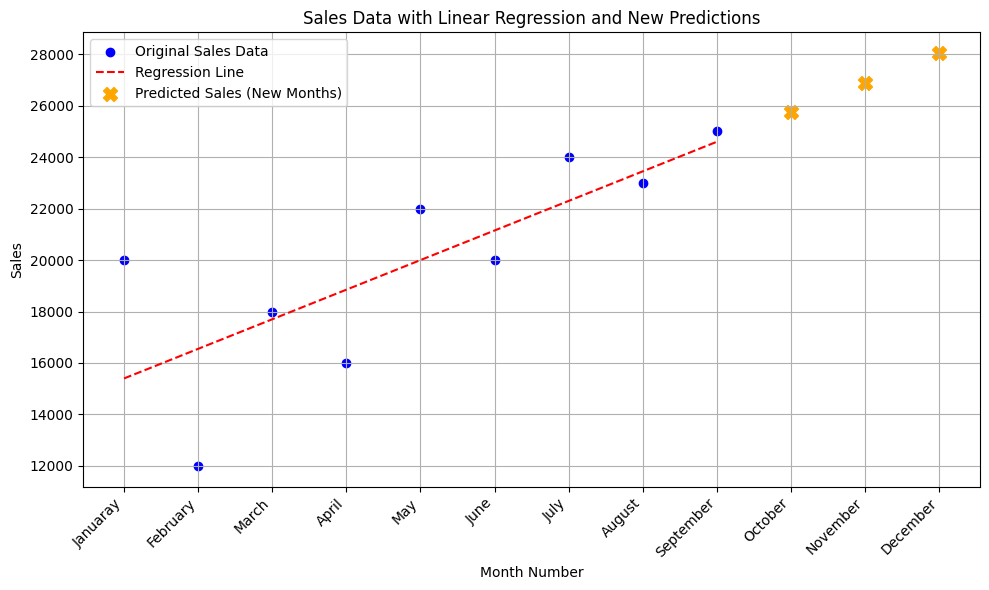

In [43]:
plt.figure(figsize=(10, 6))

# Plot original sales data points
plt.scatter(sales_df['Month_Num'], sales_df['Sales'], color='blue', label='Original Sales Data')

# Plot the linear regression line for the original months
plt.plot(months_np_array, y_pred_math, color='red', linestyle='--', label='Regression Line')

# Plot the predicted sales for new months
plt.scatter(new_months_df['Month_Num'], new_months_df['Predicted_Sales'], color='orange', marker='X', s=100, label='Predicted Sales (New Months)')

# Add plot labels and title
plt.title('Sales Data with Linear Regression and New Predictions')
plt.xlabel('Month Number')
plt.ylabel('Sales')
plt.xticks(combined_sales_df['Month_Num'], combined_sales_df['Months'], rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
new_x = float(input("Enter a new  month x value for prediction: "))

print(f"New x value for prediction: {new_x}")

# --- Prediction using the Mathematical Model ---
predicted_y_math = m * new_x + b
print(f"Predicted y : {predicted_y_math:.2f}")

Enter a new  month x value for prediction: 12
New x value for prediction: 12.0
Predicted y : 28050.00
